# Opencv 

refs:
* https://www.datacamp.com/community/tutorials/face-detection-python-opencv

In [1]:
import sys
import numpy as np
import cv2
import matplotlib.pyplot as plt

import math

import IPython
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from utils import print_7_number

%matplotlib inline

Install opencv

```sh
conda install -c conda-forge opencv
```

In [2]:
sys.version
cv2.__version__

'3.7.7 (default, Mar 23 2020, 22:36:06) \n[GCC 7.3.0]'

'3.4.2'

## Read and write images and convert between color space 

In [3]:
!ls images

add_data.png		       no_data_pipeline.png
baby1.jpeg		       non-linear_and_linear_decision_edge.png
biasvariance.png	       notebook_vs_code.png
closing.png		       onehot.png
cv2-resize-image-original.png  opening.png
data_frame.png		       pathlib_cheatsheet_p1.png
final_image.png		       pivot-table-datasheet.png
hig_bias_low_variance.png      refactor_notebooks.png
iris_petal_sepal.png	       resampling.png
irr_error.png		       shapes_1.jpg
layers.jpeg		       shapes.jpg
learning_rate2.png	       shapes.png
learning_rate.png	       smote.png
loss_learning_rate.png	       split-apply-combine.png
low_high_var.png	       tomek.png
mandrill_colour.png	       with_data_pipeline.png
minibatch_learning_rate.png    xfiles.jpeg
neuron_ANN.png


In [4]:
img_raw = cv2.imread('images/mandrill_colour.png')

img_raw.shape

(288, 288, 3)

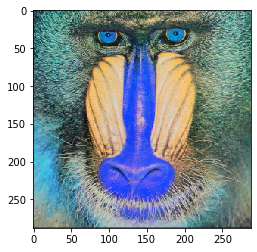

In [5]:
# OpenCV reads images in the form of BGR, matplotlib, on the other hand, follows the order of RGB.
plt.imshow(img_raw)

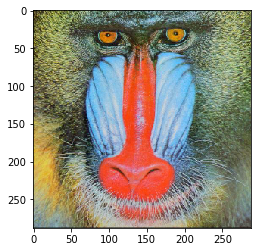

In [6]:
img = cv2.cvtColor(img_raw, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [7]:
cv2.imwrite('images/final_image.png',img)

True

## Draw in image

* Rectangle 
* Circle 
* Lines


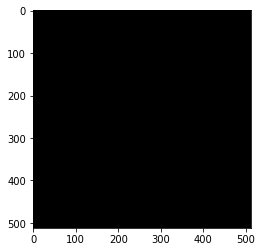

In [8]:
image_blank = np.zeros(shape=(512,512,3),dtype=np.int16)

plt.imshow(image_blank)

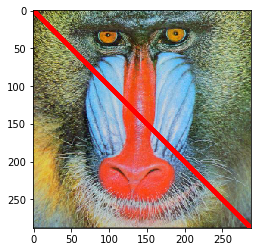

In [9]:
# Draw a diagonal red line with thickness of 5 px
thickness = 5
red = (255,0,0)
line_red = cv2.line(img,(0,0),(511,511),red,thickness)

plt.imshow(line_red)

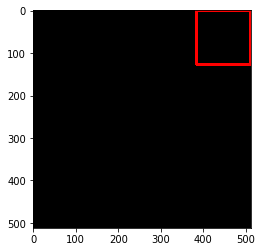

In [10]:
# Draw a blue rectangle with a thickness of 5 px

rectangle= cv2.rectangle(image_blank,(384,0),(510,128),(255,0,0),5)
plt.imshow(rectangle)

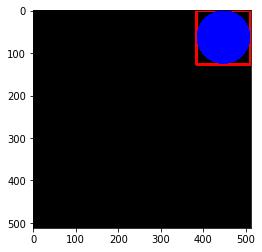

In [11]:
circle = cv2.circle(image_blank,(447,63), 63, (0,0,255), -1) # -1 corresponds to a filled circle
plt.imshow(circle)

## Basic operations

In [51]:
img_raw.shape

# fixing color channel first
_img = cv2.cvtColor(img_raw, cv2.COLOR_BGR2RGB)

(288, 288, 3)

### Normalize

0.0

1.0

0.0

255.0

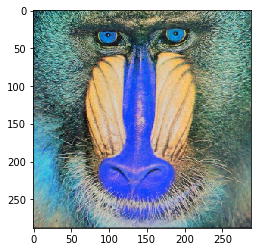

In [54]:
img_norm = cv2.normalize(img_raw.astype('float'),None,  0, 1.0, cv2.NORM_MINMAX)

img_norm.min()
img_norm.max()


img_norm2 = cv2.normalize(img_norm,None, 0, 255, cv2.NORM_MINMAX)
img_norm2.min()
img_norm2.max()

plt.imshow(img_norm2.astype('int'))

### Split and merge channels

(288, 288)

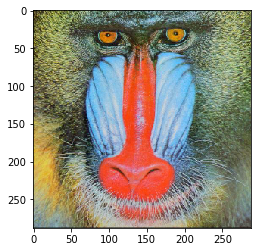

In [53]:
R, G, B = cv2.split(_img)
R.shape

_img2 = cv2.merge((R,G,B))
plt.imshow(_img2)

### Crop image

(288, 288, 3)

(144, 144, 3)

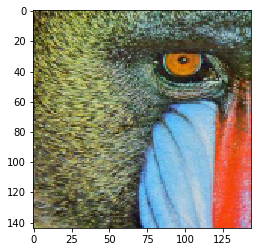

In [24]:

cropped = _img[0:144, 0:144]
cropped.shape

plt.imshow(cropped)

### Rotate

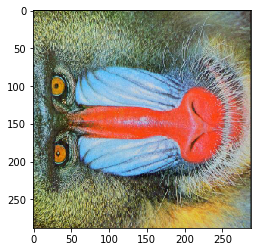

In [28]:
# grab the dimensions of the image and calculate the center
# of the image
(h, w) = _img.shape[:2]
center = (w / 2, h / 2)

# rotate the image by 90 degrees
M = cv2.getRotationMatrix2D(center, 90, 1.0)
rotated = cv2.warpAffine(_img, M, (w, h))

plt.imshow(rotated)

### Change image resolution

(288, 288, 3)

(144, 144, 3)

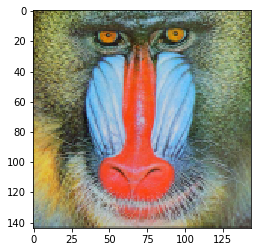

In [19]:
_img.shape

# preserve aspect ratio

#percent by which the image is resized
scale_percent = 50

#calculate the 50 percent of original dimensions
width = int(_img.shape[1] * scale_percent / 100)
height = int(_img.shape[0] * scale_percent / 100)

# dsize
dsize = (width, height)

# resize image
output = cv2.resize(_img, dsize)

output.shape

plt.imshow(output)
plt.show()

### Convert to grascale

img_raw shape (BGR): (288, 288, 3)
gray shape: (288, 288)


{'min': 8,
 'q1': 102.0,
 'mean': 128.91080729166666,
 'median': 130.0,
 'q3': 161.0,
 'max': 225,
 'std': 39.38913286077055}

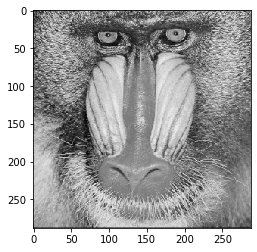

In [13]:
#gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

gray = cv2.cvtColor(img_raw, cv2.COLOR_BGR2GRAY)

print(f"img_raw shape (BGR): {img_raw.shape}")
print(f"gray shape: {gray.shape}")

print_7_number(gray)

plt.imshow(gray, cmap='gray')
plt.show()
#cv2.imshow('Gray image', gray)

### Binarize image

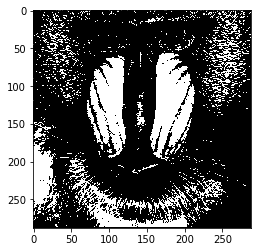

In [17]:
th = 160
img_bin = gray > th

plt.imshow(img_bin, cmap='gray')
plt.show()

## Morphological operation

https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_morphological_ops/py_morphological_ops.html

### Dilation and erosion

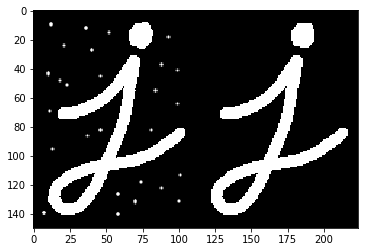

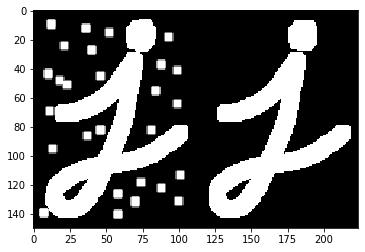

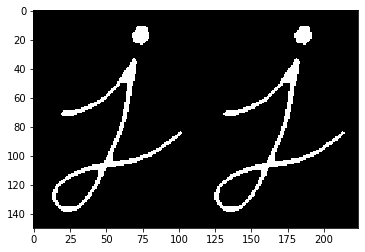

In [58]:
img = cv2.imread('images/opening.png',0)

kernel = np.ones((5,5),np.uint8)

dilation = cv2.dilate(img,kernel,iterations = 1)
erosion = cv2.erode(img,kernel,iterations = 1)


plt.imshow(img, cmap='gray')
plt.show()


plt.imshow(dilation, cmap='gray')
plt.show()

plt.imshow(erosion, cmap='gray')
plt.show()

### Closing

* Closing is reverse of Opening, Dilation followed by Erosion.

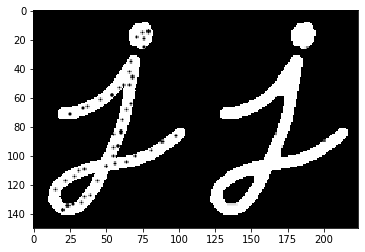

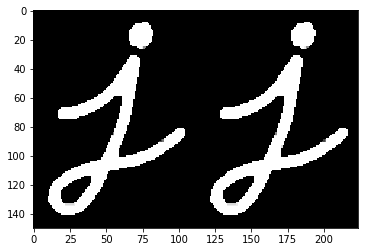

In [67]:
img = cv2.imread('images/closing.png',0)

closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)


plt.imshow(img, cmap='gray')
plt.show()
plt.imshow(closing, cmap='gray')
plt.show()

### Opening


* Opening is just another name of erosion followed by dilation. It is useful in removing noise

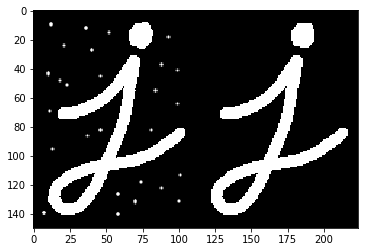

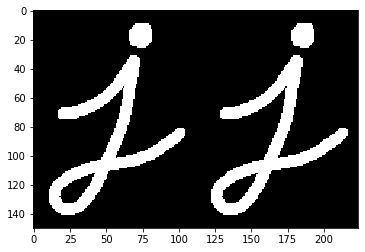

In [66]:
img = cv2.imread('images/opening.png',0)

opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

plt.imshow(img, cmap='gray')
plt.show()
plt.imshow(opening, cmap='gray')
plt.show()

### Gradient

* It is the difference between dilation and erosion of an image.

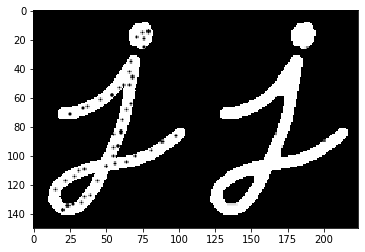

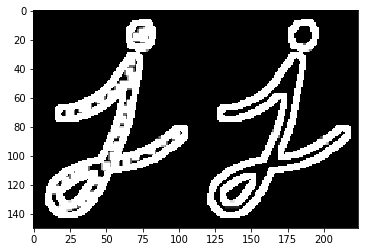

In [69]:
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)

plt.imshow(img, cmap='gray')
plt.show()
plt.imshow(gradient, cmap='gray')
plt.show()

## Images properties or statistics


1. histograms 
1. histograms equalizations
1. Compute dominat collor of the image
1. Compute and change brigthness


### Brigthness 

refs:
* https://www.kaggle.com/aleksandradeis/globalwheatdetection-eda
* https://stackoverflow.com/questions/3490727/what-are-some-methods-to-analyze-image-brightness-using-python


In [16]:
def get_mean_brightness(image):
    # convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # get average brightness
    return np.array(gray).mean()


def get_mean_perceived_brightness(image):
    ## Assuming BGR images
    
    mean_b = np.mean(image[:,:,0])
    mean_g = np.mean(image[:,:,1])
    mean_r = np.mean(image[:,:,2])
    
    return math.sqrt(0.241*(mean_r**2) + 0.691*(mean_g**2) + 0.068*(mean_b))

In [20]:
img_raw = cv2.imread('images/mandrill_colour.png')

brightness = get_image_mean_brightness(img_raw)

print(f"mean brightness: {brightness:.2f}")

brightness = get_mean_perceived_brightness(img_raw)
print(f"mean perceived brightness: {brightness:.2f}")

mean brightness: 128.91
mean perceived brightness: 126.10


* **change brigthness of the image**

In [87]:
def change_brightness(img, value=30):
    
    # convert to HSV: Hue, Saturation and lightness (value)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)

    # increase birgtness or lightnen 
    if value > 0:
        # check images limit
        lim = 255 - value
        v[v > lim] = 255
        v[v <= lim] += value

    else:
        # decrease birghtness or darknen 
        lim = -value
        v[v <= lim] = 0
        v[v > lim] = v[v > lim] - lim
    
    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    
    return img

before mean perceived brightness: 126.10
 brightness
after mean perceived brightness: 164.05
Decreasing brightness
after mean perceived brightness: 84.11


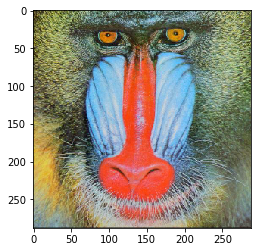

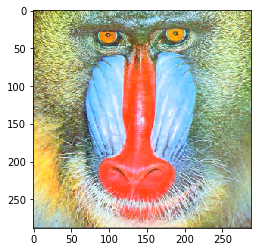

(<matplotlib.image.AxesImage at 0x7fabc9ec7bd0>, (-0.5, 287.5, 287.5, -0.5))

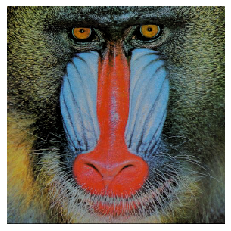

In [88]:
brightness = get_mean_perceived_brightness(img_raw)
print(f"before mean perceived brightness: {brightness:.2f}")


print(" brightness")
img2 = change_brightness(img_raw, 50)
brightness = get_mean_perceived_brightness(img2)

print(f"after mean perceived brightness: {brightness:.2f}")

print("Decreasing brightness")
img3 = change_brightness(img_raw,-50)
brightness = get_mean_perceived_brightness(img3)

print(f"after mean perceived brightness: {brightness:.2f}")


# Show image
img_rbg = cv2.cvtColor(img_raw, cv2.COLOR_BGR2RGB)
plt.imshow(img_rbg)
plt.show()
img_rbg = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.imshow(img_rbg)
plt.show()
img_rbg = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
plt.imshow(img_rbg), plt.axis("off")
plt.show()

### Histogram

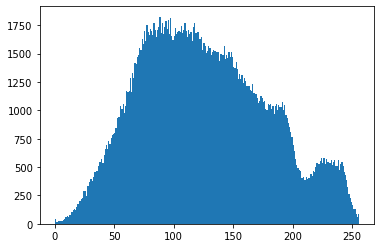

In [80]:
hist,bins = np.histogram(img_raw.ravel(),256,[0,256])

_ = plt.hist(img_raw.ravel(),256,[0,256]); 
plt.show()

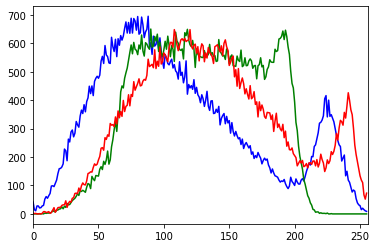

In [86]:
def plot_rgb_histogram(img):
    
    color = ('b','g','r')
    for i,col in enumerate(color):
    
        histr = cv2.calcHist([img],[i],None,[256],[0,256])
    
        _ = plt.plot(histr,color = col);
        _ = plt.xlim([0,256]);
    
    plt.show()
    
plot_rgb_histogram(img_raw)

### Histogram equalization

Increase **contrast**


In [4]:
# https://chrisalbon.com/machine_learning/preprocessing_images/enhance_contrast_of_greyscale_image/

img_raw = cv2.imread('images/mandrill_colour.png')
img_raw.shape
gray = cv2.cvtColor(img_raw, cv2.COLOR_BGR2GRAY)

# Enhance image
image_enhanced = cv2.equalizeHist(gray)

(288, 288, 3)

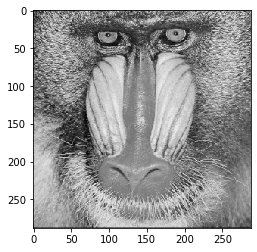

(<matplotlib.image.AxesImage at 0x7fabd0c78690>, (-0.5, 287.5, 287.5, -0.5))

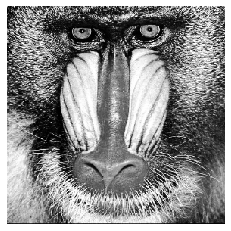

In [7]:
# Show image
plt.imshow(gray, cmap='gray')
plt.show()
plt.imshow(image_enhanced, cmap='gray'), plt.axis("off")
plt.show()

## Convolutions

### Smooth 

good for reduce noisy


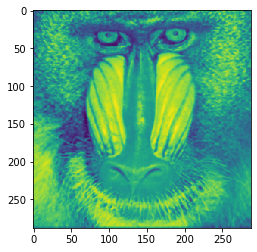

In [13]:
# remove noise
blurred = cv2.GaussianBlur(gray,(3,3),0)

plt.imshow(blurred)
plt.show()

### Sobel

good for detect edges

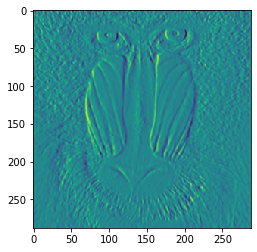

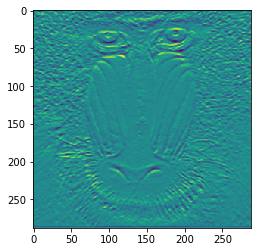

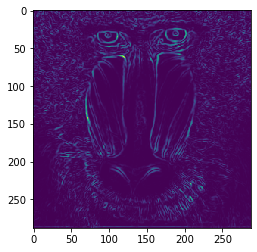

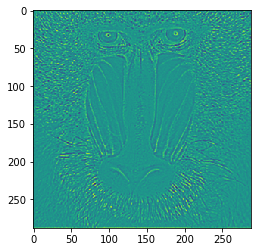

In [14]:
gx = cv2.Sobel(blurred, cv2.CV_32F, 1, 0)
gy = cv2.Sobel(blurred, cv2.CV_32F, 0, 1)

laplacian = cv2.Laplacian(blurred,cv2.CV_64F)

plt.imshow(gx)
plt.show()

plt.imshow(gy)
plt.show()

plt.imshow(gy**2 + gx**2)
plt.show()

plt.imshow(laplacian)
plt.show()

### Gabor


kernel shape: (21, 21)


{'min': -0.63018876,
 'q1': -0.15753933787345886,
 'mean': 0.0003912795,
 'median': 0.004400699399411678,
 'q3': 0.11301322281360626,
 'max': 1.0,
 'std': 0.29753986}

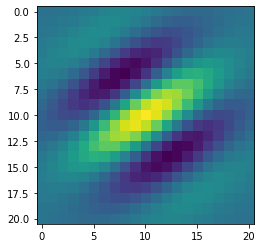

In [17]:
kernel = cv2.getGaborKernel((21, 21), 5, 1, 10, 1, 0, cv2.CV_32F)

print(f"kernel shape: {kernel.shape}")
print_7_number(kernel)


# print("normalizing")
# # normalize kernel
# kernel /= math.sqrt((kernel * kernel).sum())

plt.imshow(kernel)
plt.show()

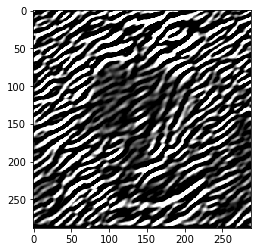

In [18]:
filtered = cv2.filter2D(blurred, -1, kernel)

plt.imshow(filtered,cmap='gray')
plt.show()

## Spectrum analsys

### Fourier transform

img shape: (169, 298)


{'min': 0.0,
 'q1': 3.0,
 'mean': 33.02812,
 'median': 3.0,
 'q3': 8.0,
 'max': 255.0,
 'std': 65.924706}

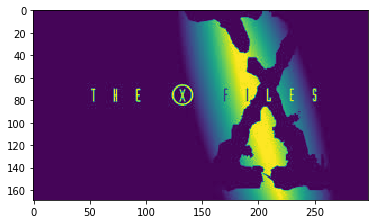

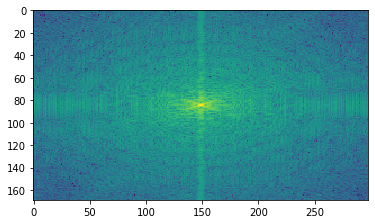

In [21]:
img = cv2.imread('images/xfiles.jpeg',0)
print(f"img shape: {img.shape}")

img_float32 = np.float32(img)

print_7_number(img_float32)

# FFT 
dft = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT)

# CENTER FFT
dft_shift = np.fft.fftshift(dft)

dft_mag = cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1])

plt.imshow(img)
plt.show()
plt.imshow(np.log(dft_mag))
plt.show()

low pass mask shape: (169, 298, 2)
images centers : (84, 149)


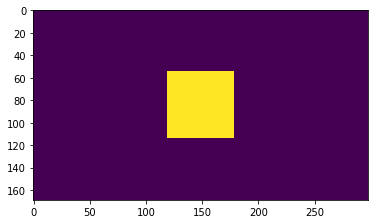

In [22]:
# Low PASS filter

rows, cols = img.shape
crow, ccol = rows//2 , cols//2     # center

## LOW PASS FILTER
# create a mask first, center square is 1, remaining all zeros
mask = np.zeros((rows, cols, 2), np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1

print(f"low pass mask shape: {mask.shape}")
print(f"images centers : {(crow, ccol)}")
plt.imshow(mask[:,:,0])

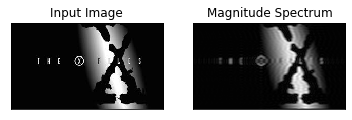

In [23]:
# apply mask and inverse DFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)

img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

_ = plt.subplot(121),plt.imshow(img, cmap = 'gray');
_ = plt.title('Input Image'), plt.xticks([]), plt.yticks([]);
_ = plt.subplot(122),plt.imshow(img_back, cmap = 'gray');
_ = plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([]);

plt.show()                

### Wavelets 

**TODO**

## Countours and bounding shapes

ref: 
* https://docs.opencv.org/trunk/d9/d8b/tutorial_py_contours_hierarchy.html
* https://docs.opencv.org/3.4/dd/d49/tutorial_py_contour_features.html


### Find countours

Understand the code in the cell bellow 
* preprocesing
    1. invert image levels
    1. binarize 
    1. closing to closing shapes gaps near the borders

* Contours
    1. find contours
    1. compute area and perimeter
    
* Show dont tell me

(282, 320, 3)

0

0.0

255

(282, 320, 3)

(282, 320)

find 4 contours; type: <class 'list'>
contour: 0; type: <class 'numpy.ndarray'>; len: 120; shape: (120, 1, 2) first item: [[109 188]] 


(282, 320, 3)

number of contours bigger than 100 points: 4 
contour: 0; len: 120; per: 297.44; area: 4285.5; color: (255, 0, 0) 
contour: 1; len: 133; per: 308.01; area: 5751.5; color: (0, 255, 0) 
contour: 2; len: 164; per: 385.14; area: 7181.0; color: (0, 0, 255) 
contour: 3; len: 149; per: 341.71; area: 4978.0; color: (255, 255, 255) 
Pre processing


(3,)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



Contours


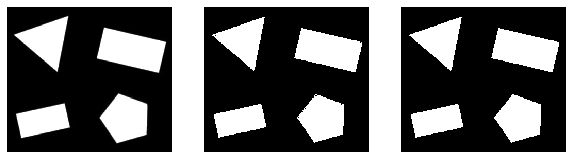

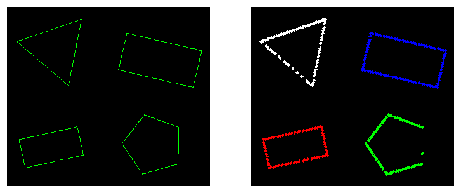

In [47]:
img = cv2.imread('images/shapes.png', cv2.IMREAD_UNCHANGED)
img.shape

# Invert image
img = 255 - img

img.min()
np.median(img)
img.max()
img.shape

# #set a thresh
thresh = 250

# # binarize image
R = img[:,:,0]
ret,thresh_img = cv2.threshold(R, thresh, 255, cv2.THRESH_BINARY)
thresh_img.shape

kernel = np.ones((5,5),np.uint8)
closing = cv2.morphologyEx(thresh_img, cv2.MORPH_CLOSE, kernel)

# find contours
im2, contours, hierarchy = cv2.findContours(closing, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

print(f"find {len(contours)} contours; type: {type(contours)}")
c = 0
print(f"contour: {c}; type: {type(contours[c])}; len: {len(contours[c])}; shape: {contours[c].shape} first item: {contours[c][0]} ")

## create an empty image for contours
img_contours = np.zeros((img.shape[0], img.shape[1],3)) #img.copy()
img_contours.shape

# draw the contours on the empty image
_color = (0,255,0)

# cv.DrawContours(img, contour, external_color, hole_color, max_level, thickness=1, lineType=8, offset=(0, 0))
img_contours = cv2.drawContours(img_contours, contours, -1, _color, 1)

# Option you can iterate over the countours 
sample_countours = list()

for k, cnt in enumerate(contours):
    
    if len(cnt) > 100:
        
        sample_countours.append(cnt)
    
print(f"number of contours bigger than 100 points: {len(sample_countours)} ")

img_contours2 = np.zeros((img.shape[0], img.shape[1],3))

_colors = [(255, 0,0), (0,255,0), (0,0,255), (255, 255,255)]
for idx, cnt in enumerate(sample_countours):
    
    if len(cnt) > 100:
    
        area = cv2.contourArea(cnt)
        per = cv2.arcLength(cnt, closed=True)
        _c = _colors[idx]
        print(f"contour: {idx}; len: {len(cnt)}; per: {per:.2f}; area: {area}; color: {_c} ")
        img_contours2 = cv2.drawContours(img_contours2, cnt, -1, _c, 3)
    


print("Pre processing")
fig, axs = plt.subplots(1, 3,figsize=(10,10))

axs.shape
_ = axs[0].imshow(img); _ = axs[ 0].axis('off')
_ = axs[1].imshow(thresh_img,cmap='gray');_ = axs[ 1].axis('off')
_ = axs[2].imshow(closing,cmap='gray');_ = axs[2].axis('off')


print()
print("Contours")
fig, axs = plt.subplots(1, 2,figsize=(8,8))
row = 0
_ = axs[ 0].imshow(img_contours);_ = axs[ 0].axis('off')
_ = axs[1].imshow(img_contours2);_ = axs[1].axis('off')

## Face detection


OpenCV comes with a lot of pre-trained classifiers. For instance, there are classifiers for smile, eyes, face, etc.


test_image shape (BGR): (240, 362, 3)


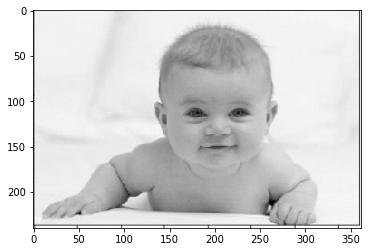

In [16]:
#Loading the image to be tested
test_image = cv2.imread('images/baby1.jpeg')

print(f"test_image shape (BGR): {test_image.shape}")

#Converting to grayscale
test_image_gray = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)

# Displaying the grayscale image
plt.imshow(test_image_gray, cmap='gray')

Face detection (Haar):


We shall be using the **detectMultiscale** module of the classifier. This function will return a rectangle with coordinates(x,y,w,h) around the detected face. This function has two important parameters which have to be tuned according to the data.

refs: 
* http://wearables.cc.gatech.edu/paper_of_week/viola01rapid.pdf
* https://docs.opencv.org/2.4.13.2/modules/objdetect/doc/cascade_classification.html#cv2.CascadeClassifier.detectMultiScale


Main parameters:

* scalefactor In a group photo, there may be some faces which are near the camera than others. Naturally, such faces would appear more prominent than the ones behind. This factor compensates for that.

* minNeighbors This parameter specifies the number of neighbors a rectangle should have to be called a face. 


```sh
# Download the classifier
curl -sSo haarcascade_frontalface_default.xml http://stash.compciv.org/opencv/haarcascades/haarcascade_frontalface_default.xml
```


In [17]:
haar_cascade_face = cv2.CascadeClassifier('data/haarcascade_frontalface_default.xml')

type(haar_cascade_face)

test_image_gray.shape

faces_rects = haar_cascade_face.detectMultiScale(test_image, scaleFactor = 1.2, minNeighbors = 5);

# Let us print the no. of faces found
print('Faces found: ', len(faces_rects))

cv2.CascadeClassifier

(240, 362)

Faces found:  1


In [18]:
for (x,y,w,h) in faces_rects:
     _ = cv2.rectangle(test_image, (x, y), (x+w, y+h), (0, 255, 0), 2)

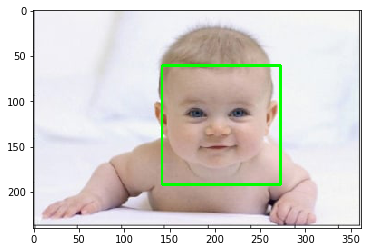

In [19]:
def convertToRGB(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(convertToRGB(test_image))

## Superpixel

test_image shape (BGR): (240, 362, 3)


(240, 362)

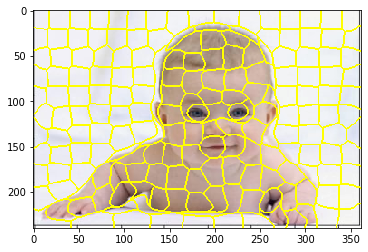

In [55]:
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries

#Loading the image to be tested
_img = cv2.imread('images/baby1.jpeg')
_img = cv2.cvtColor(_img, cv2.COLOR_BGR2RGB)

print(f"test_image shape (BGR): {_img.shape}")


n_segments = 200

segments = slic(_img, n_segments = n_segments, sigma = 5)
segments.shape

plt.imshow(mark_boundaries(_img, segments))

* iterate over all superpixel

In [58]:
import collections

seg_values = [v for v in np.unique(segments)]

_counter = collections.Counter(segments.flatten().tolist())

seg_values[0:5]

print(f"#unique segments value: {len(seg_values)}")

print(f"largets superpixel {_counter.most_common()[0]}")
_counter[5]

print()
# Inspecting the mask
segments[0:50,0:50]

[0, 1, 2, 3, 4]

#unique segments value: 183
largets superpixel (37, 793)


446

array([[ 0,  0,  0, ...,  2,  2,  2],
       [ 0,  0,  0, ...,  2,  2,  2],
       [ 0,  0,  0, ...,  2,  2,  2],
       ...,
       [44, 44, 44, ..., 39, 39, 39],
       [44, 44, 44, ..., 39, 39, 39],
       [44, 44, 44, ..., 39, 39, 39]])

In [61]:
%%time
summary_dict = dict()

#Converting to grayscale
gray = cv2.cvtColor(_img, cv2.COLOR_BGR2GRAY)

mask = np.ones(gray.shape[:2])
for v in seg_values:
    
    mask[:,:] = 1

    mask[segments == v] = 0
    
    _img_masked = np.ma.array(gray, 
                              mask=mask)
    
        
    summary_dict[v] = {'count': _img_masked.count(),
                       'min': _img_masked.min(),
                       'mean': _img_masked.mean(),
                       'max': _img_masked.max(),
                       'std': _img_masked.std() 
                      }

v = 11   
summary_dict[v]

CPU times: user 339 ms, sys: 0 ns, total: 339 ms
Wall time: 339 ms


{'count': 466,
 'min': 242,
 'mean': 243.87768240343348,
 'max': 246,
 'std': 0.7295537718354786}

## Segmentation